In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import pickle as pkl

In [64]:
df = pd.read_csv(r'C:\Users\Sazgar\Desktop\df.csv')
df
#using lambda and apply method for removing all none-numerical values in 'Salary Estimate' column
df['Salary Estimate'] = df['Salary Estimate'].apply( lambda x : x.replace("$", " ").replace("K", " ").replace("𝐾", " ").replace("(Glassdoor est.)", " "))


#removing rows containing '-1' and 'Per Hour' in 'Salary Estimate' column
df = df[~df['Salary Estimate'].str.contains('Per Hour')]
df = df[df['Salary Estimate'] != '-1']

#split 'Salary Estimate' column and put min and max salary into two new column
df["Min_Salary"] = df['Salary Estimate'].apply(lambda x : x.split()[0])
df["Max_Salary"] = df['Salary Estimate'].apply(lambda x : x.split()[2])


#changing new column type from string to integer
df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_Salary'] = df['Max_Salary'].astype(int)


#add new column that indicates min and max salary average
df["Average Salary"] = (df['Max_Salary'] + df['Min_Salary'])/2


#remove the city part of 'Location' column and put the states into a new column named 'State'
df['State'] = df['Location'].apply(lambda x : x.split()[-1])


#check the values in new column
df['State'].value_counts()


#removing 'Kingdom' value from amercian states
df = df[~df['State'].str.contains('Kingdom')]


#to have a list of all columns
df.columns

#removing unnessesary columns
df.drop(columns = ['Company Name', 'Size', 'Founded', 'Type of ownership', 'Revenue', 'Sector' ])

#for categorizing job titles
def job_organizer (x):
    x = x.lower()
    if ('data scientist' in x) or ('data science' in x):
        return 'Data Scientist'
    elif ('analyst' in x):
        return 'Analyst'
    elif ('machine learning' in x):
        return 'Machine Learning Engineer'
    elif ('deep learning' in x):
        return 'Deep Learning Engineer'
    elif ('director' in x):
        return 'Director'
    elif ('manager' in x):
        return 'Manager'
    else:
        return 'Other'
df['Job Title'] = df['Job Title'].apply(job_organizer)

In [65]:
#drop unnessesary columns from Data Frame
df = df.drop(columns = ["Salary Estimate", "Company Name", "Location", "Size", "Founded", "Type of ownership", "Industry",
                  "Sector", "Revenue", "Min_Salary", "Max_Salary"])

In [66]:
#take a look at Data Frame after dripping columns
df

,Job Title,Rating,Average Salary,State
0,Data Scientist,3.5,146.0,NY
1,Data Scientist,4.5,146.0,NY
2,Data Scientist,-1.0,146.0,NY
3,Analyst,3.4,146.0,NJ
4,Data Scientist,3.4,146.0,NY
...,...,...,...,...
5881,Other,3.2,51.0,OH
5882,Other,4.2,68.0,OH
5883,Other,4.0,89.5,OH
5886,Analyst,4.0,89.0,OH


In [67]:
#removing -1.0 from Rating column
value_to_remove = [-1.0]
df = df[df['Rating'] != value_to_remove[0]]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average Salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


In [69]:
# based on ML models we need to label the characterized columns with numericals
pd.get_dummies(df, columns=['Job Title'])
pd.get_dummies(df, columns=['Job Title','State'])
df = pd.get_dummies(df, columns=['Job Title','State'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               4891 non-null   float64
 1   Average Salary                       4891 non-null   float64
 2   Job Title_Analyst                    4891 non-null   uint8  
 3   Job Title_Data Scientist             4891 non-null   uint8  
 4   Job Title_Deep Learning Engineer     4891 non-null   uint8  
 5   Job Title_Director                   4891 non-null   uint8  
 6   Job Title_Machine Learning Engineer  4891 non-null   uint8  
 7   Job Title_Manager                    4891 non-null   uint8  
 8   Job Title_Other                      4891 non-null   uint8  
 9   State_AZ                             4891 non-null   uint8  
 10  State_CA                             4891 non-null   uint8  
 11  State_DC                      

In [71]:
df.to_csv('preprocessed_df.csv', index= False)

In [88]:
# linear regression is the model that we decided to use, so it is time to divide X and y
X = df.drop(columns = 'Average Salary')
y = df['Average Salary']



In [89]:
# separating X and y to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)


34235739750142.883
[ 1.98641169e+00 -5.47199695e+13 -5.47199695e+13 -5.47199695e+13
 -5.47199695e+13 -5.47199695e+13 -5.47199695e+13 -5.47199695e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13  2.04842297e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13  2.04842297e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13  2.04842297e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13  2.04842297e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13  2.04842297e+13
  2.04842297e+13  2.04842297e+13  2.04842297e+13]


In [91]:
prediction = lr.predict(X_test)
prediction

array([ 93.5703125 , 126.12890625,  90.80078125,  74.8046875 ,
        97.88671875, 121.24609375,  90.80078125,  86.3203125 ,
       106.77734375, 127.51953125,  80.2578125 , 139.20703125,
        95.69140625,  85.328125  ,  95.69140625,  95.29296875,
        94.609375  , 136.47265625,  91.4296875 , 109.75      ,
       139.01171875,  86.1484375 , 122.04296875, 120.88671875,
        88.41796875,  75.171875  ,  96.08203125, 108.109375  ,
        90.734375  , 128.12109375,  96.21875   , 120.84765625,
        87.42578125,  96.28515625,  83.8046875 , 125.53515625,
        97.08203125, 111.64453125,  92.60546875, 113.6171875 ,
       125.17578125, 121.24609375, 106.37890625,  86.515625  ,
        77.921875  , 127.51953125,  95.09375   , 127.32421875,
        98.6015625 , 115.65625   , 149.73046875, 102.7265625 ,
       137.26171875,  86.125     , 106.98046875,  89.21484375,
       138.21484375,  97.47265625,  97.2109375 , 107.109375  ,
       127.32421875, 137.16015625,  89.80859375, 120.25

In [92]:
residual = prediction - y_test
residual

4607    11.570312
3136   -30.371094
2694    20.300781
4633     9.304688
4490   -29.113281
          ...    
1075   -36.613281
460    -48.675781
1134    33.332031
4759    10.414062
2039   -22.019531
Name: Average Salary, Length: 979, dtype: float64

C:\Users\Sazgar\AppData\Local\Temp\ipykernel_4384\2283948901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50)


<Axes: xlabel='Average Salary', ylabel='Density'>

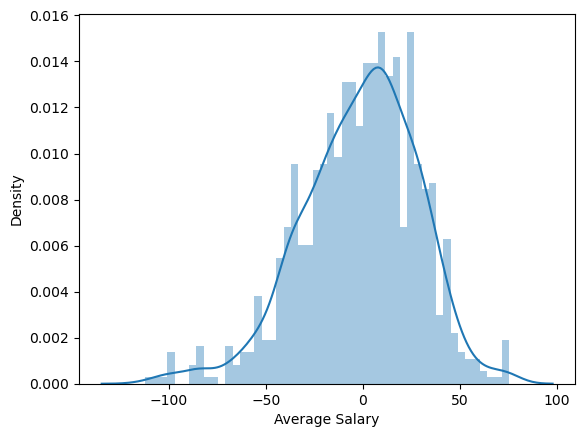

In [93]:
sns.distplot(residual,bins=50)


In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))


MAE: 23.46859039836568


In [97]:
pkl.dump(lr, open('Salary_Estimater.pkl' , 'wb'))